# 📊 Fall Detection Latency Analysis

This notebook analyzes inference latency performance comparing:
- **Tier 1 (Local)**: Core ML inference on iPhone device
- **Tier 2 (Cloud)**: AWS SageMaker inference (network round-trip)

## Test Devices:
- **Phone 0**: iPhone 15 Pro Max
- **Phone 1**: iPhone 13 Mini
- **Phone 2**: iPhone 11 Pro Max

## Input File:
- `latency_data.csv` - Latency measurements in milliseconds (ms)

**Data Format:**
- `phone` - Device ID (0=15 Pro Max, 1=13 Mini, 2=11 Pro Max)
- `tier` - Inference type (1=Local, 2=Cloud)
- `latency` - Inference time in milliseconds (ms)

---
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


---
## 2. Define Device Mapping

In [2]:
# Device mapping
phone_names = {
    0: 'iPhone 15 Pro Max',
    1: 'iPhone 13 Mini',
    2: 'iPhone 11 Pro Max'
}

# Tier mapping
tier_names = {
    1: 'Local (Core ML)',
    2: 'Cloud (SageMaker)'
}

# Device specifications
device_specs = {
    0: {'chip': 'A17 Pro', 'year': 2023, 'neural_engine': '16-core'},
    1: {'chip': 'A15 Bionic', 'year': 2021, 'neural_engine': '16-core'},
    2: {'chip': 'A13 Bionic', 'year': 2019, 'neural_engine': '8-core'}
}

print("📱 Device Information:")
print("="*60)
for phone_id, name in phone_names.items():
    specs = device_specs[phone_id]
    print(f"Phone {phone_id}: {name}")
    print(f"  • Chip: {specs['chip']}")
    print(f"  • Year: {specs['year']}")
    print(f"  • Neural Engine: {specs['neural_engine']}")
    print()
print("="*60)

📱 Device Information:
Phone 0: iPhone 15 Pro Max
  • Chip: A17 Pro
  • Year: 2023
  • Neural Engine: 16-core

Phone 1: iPhone 13 Mini
  • Chip: A15 Bionic
  • Year: 2021
  • Neural Engine: 16-core

Phone 2: iPhone 11 Pro Max
  • Chip: A13 Bionic
  • Year: 2019
  • Neural Engine: 8-core



---
## 3. Load Data

In [3]:
# Load latency data
df = pd.read_csv('latency_data.csv')

print("✅ Data loaded successfully!")
print(f"\nTotal measurements: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"\nData shape: {df.shape}")
print(f"\nFirst 10 rows:")
print(df.head(10))

✅ Data loaded successfully!

Total measurements: 90
Columns: ['phone', 'tier', 'latency']

Data shape: (90, 3)

First 10 rows:
   phone  tier  latency
0      0     1     38.6
1      0     2    234.4
2      0     1      6.6
3      0     2    234.4
4      0     1      5.2
5      0     2    283.8
6      0     1      5.1
7      0     2    229.6
8      0     1      5.7
9      0     2    216.8


---
## 4. Data Validation & Enrichment

In [4]:
# Add descriptive names
df['phone_name'] = df['phone'].map(phone_names)
df['tier_name'] = df['tier'].map(tier_names)

# Validate data
print("📊 Data Validation:")
print("="*60)
print(f"Unique phones: {df['phone'].nunique()} (Expected: 3)")
print(f"Unique tiers: {df['tier'].nunique()} (Expected: 2)")
print(f"\nMeasurements per phone:")
print(df['phone_name'].value_counts().sort_index())
print(f"\nMeasurements per tier:")
print(df['tier_name'].value_counts())
print(f"\nMeasurements per phone-tier combination:")
print(df.groupby(['phone_name', 'tier_name']).size().unstack(fill_value=0))
print("="*60)

# Check for missing values
if df.isnull().sum().any():
    print("\n⚠️ Missing values detected:")
    print(df.isnull().sum())
else:
    print("\n✅ No missing values!")

📊 Data Validation:
Unique phones: 3 (Expected: 3)
Unique tiers: 2 (Expected: 2)

Measurements per phone:
phone_name
iPhone 11 Pro Max    30
iPhone 13 Mini       30
iPhone 15 Pro Max    30
Name: count, dtype: int64

Measurements per tier:
tier_name
Local (Core ML)      45
Cloud (SageMaker)    45
Name: count, dtype: int64

Measurements per phone-tier combination:
tier_name          Cloud (SageMaker)  Local (Core ML)
phone_name                                           
iPhone 11 Pro Max                 15               15
iPhone 13 Mini                    15               15
iPhone 15 Pro Max                 15               15

✅ No missing values!


---
## 5. Descriptive Statistics

In [5]:
print("📈 Latency Statistics by Device and Tier:\n")
print("="*80)

for phone_id in sorted(df['phone'].unique()):
    phone_data = df[df['phone'] == phone_id]
    phone_name = phone_names[phone_id]
    
    print(f"\n{phone_name} ({device_specs[phone_id]['chip']})")
    print("-"*80)
    
    for tier in [1, 2]:
        tier_data = phone_data[phone_data['tier'] == tier]['latency']
        tier_name = tier_names[tier]
        
        if len(tier_data) > 0:
            print(f"\n  {tier_name}:")
            print(f"    Measurements: {len(tier_data)}")
            print(f"    Mean:         {tier_data.mean():.2f} ms")
            print(f"    Median:       {tier_data.median():.2f} ms")
            print(f"    Std Dev:      {tier_data.std():.2f} ms")
            print(f"    Min:          {tier_data.min():.2f} ms")
            print(f"    Max:          {tier_data.max():.2f} ms")
            print(f"    25th %ile:    {tier_data.quantile(0.25):.2f} ms")
            print(f"    75th %ile:    {tier_data.quantile(0.75):.2f} ms")
            print(f"    95th %ile:    {tier_data.quantile(0.95):.2f} ms")

print("\n" + "="*80)

📈 Latency Statistics by Device and Tier:


iPhone 15 Pro Max (A17 Pro)
--------------------------------------------------------------------------------

  Local (Core ML):
    Measurements: 15
    Mean:         8.14 ms
    Median:       6.30 ms
    Std Dev:      8.49 ms
    Min:          4.00 ms
    Max:          38.60 ms
    25th %ile:    5.15 ms
    75th %ile:    6.70 ms
    95th %ile:    16.90 ms

  Cloud (SageMaker):
    Measurements: 15
    Mean:         242.14 ms
    Median:       231.10 ms
    Std Dev:      28.65 ms
    Min:          216.70 ms
    Max:          319.60 ms
    25th %ile:    228.45 ms
    75th %ile:    242.30 ms
    95th %ile:    294.54 ms

iPhone 13 Mini (A15 Bionic)
--------------------------------------------------------------------------------

  Local (Core ML):
    Measurements: 15
    Mean:         10.67 ms
    Median:       6.80 ms
    Std Dev:      13.04 ms
    Min:          6.40 ms
    Max:          57.60 ms
    25th %ile:    6.50 ms
    75th %ile:    8.1

---
## 6. Summary Table

In [6]:
# Create summary statistics table
summary_stats = df.groupby(['phone_name', 'tier_name'])['latency'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('P95', lambda x: x.quantile(0.95))
]).round(2)

print("\n📊 Summary Statistics Table:")
print("="*100)
print(summary_stats)
print("="*100)

# Calculate speedup factors
print("\n⚡ Local vs Cloud Speedup Factors:")
print("="*60)
for phone_id in sorted(df['phone'].unique()):
    phone_name = phone_names[phone_id]
    local_mean = df[(df['phone'] == phone_id) & (df['tier'] == 1)]['latency'].mean()
    cloud_mean = df[(df['phone'] == phone_id) & (df['tier'] == 2)]['latency'].mean()
    speedup = cloud_mean / local_mean
    
    print(f"{phone_name}:")
    print(f"  Local (Tier 1):  {local_mean:.2f} ms")
    print(f"  Cloud (Tier 2):  {cloud_mean:.2f} ms")
    print(f"  Speedup Factor:  {speedup:.1f}x faster (local)")
    print()


📊 Summary Statistics Table:
                                     Count    Mean  Median    Std    Min  \
phone_name        tier_name                                                
iPhone 11 Pro Max Cloud (SageMaker)     15  228.14   225.6  12.09  204.0   
                  Local (Core ML)       15   18.79    15.5  11.79   11.7   
iPhone 13 Mini    Cloud (SageMaker)     15  246.91   235.3  28.05  219.2   
                  Local (Core ML)       15   10.67     6.8  13.04    6.4   
iPhone 15 Pro Max Cloud (SageMaker)     15  242.14   231.1  28.65  216.7   
                  Local (Core ML)       15    8.14     6.3   8.49    4.0   

                                       Max     P95  
phone_name        tier_name                         
iPhone 11 Pro Max Cloud (SageMaker)  254.8  246.54  
                  Local (Core ML)     59.0   37.09  
iPhone 13 Mini    Cloud (SageMaker)  292.5  291.17  
                  Local (Core ML)     57.6   24.28  
iPhone 15 Pro Max Cloud (SageMaker)  319.6  

---
## 7. Visualize Latency Distribution by Device

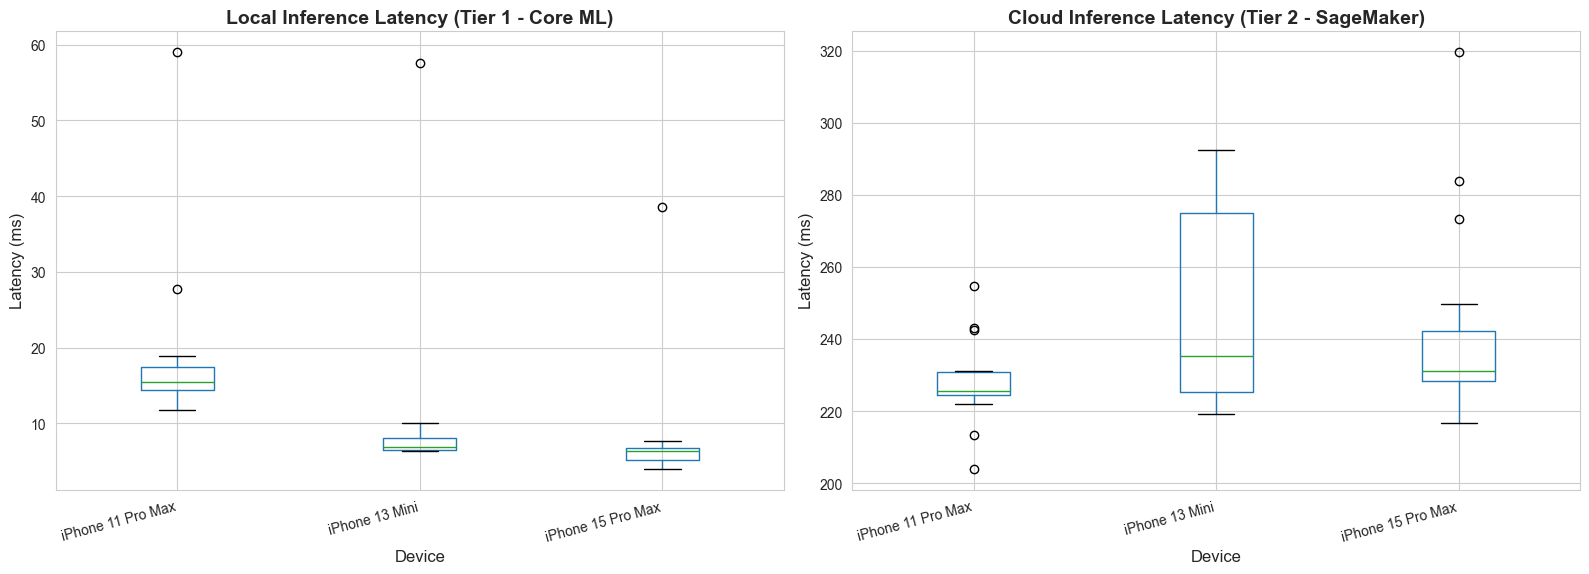

📊 Saved: latency_by_device.png


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot - Local inference
local_data = df[df['tier'] == 1]
local_data.boxplot(column='latency', by='phone_name', ax=axes[0])
axes[0].set_title('Local Inference Latency (Tier 1 - Core ML)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Device', fontsize=12)
axes[0].set_ylabel('Latency (ms)', fontsize=12)
axes[0].get_figure().suptitle('')  # Remove default title
plt.sca(axes[0])
plt.xticks(rotation=15, ha='right')

# Box plot - Cloud inference
cloud_data = df[df['tier'] == 2]
cloud_data.boxplot(column='latency', by='phone_name', ax=axes[1])
axes[1].set_title('Cloud Inference Latency (Tier 2 - SageMaker)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Device', fontsize=12)
axes[1].set_ylabel('Latency (ms)', fontsize=12)
axes[1].get_figure().suptitle('')  # Remove default title
plt.sca(axes[1])
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.savefig('latency_by_device.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: latency_by_device.png")

---
## 8. Compare Local vs Cloud Performance

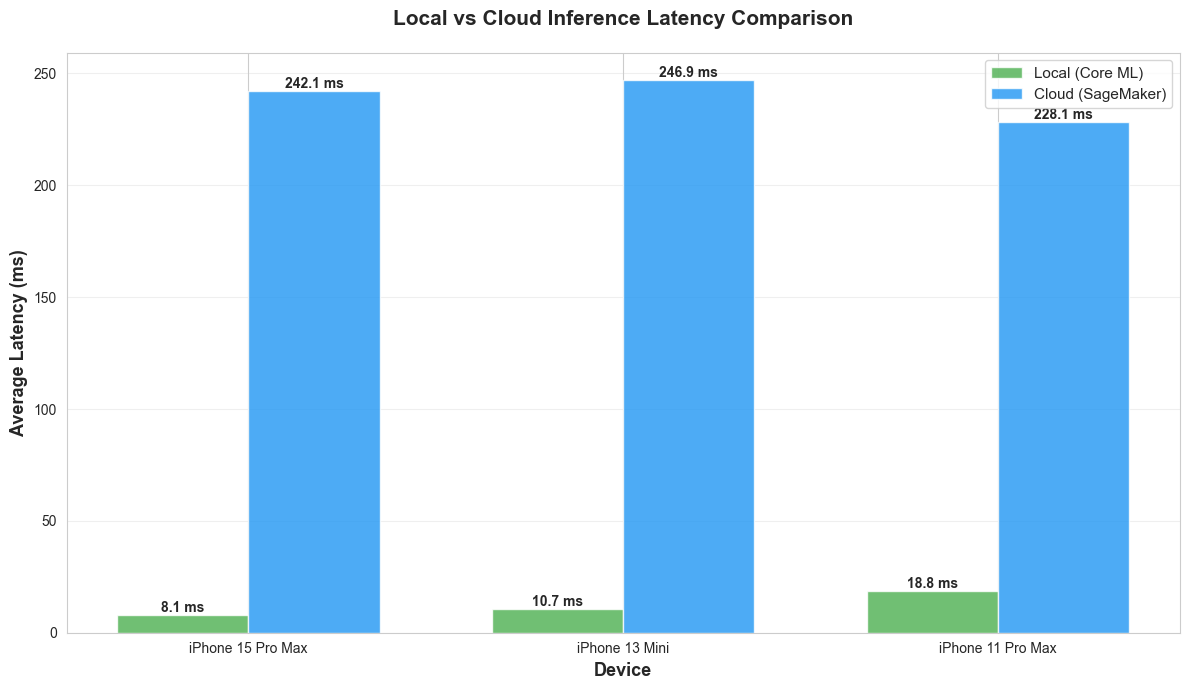

📊 Saved: local_vs_cloud_latency.png


In [8]:
# Prepare data for comparison
comparison_data = []
for phone_id in sorted(df['phone'].unique()):
    phone_name = phone_names[phone_id]
    local_mean = df[(df['phone'] == phone_id) & (df['tier'] == 1)]['latency'].mean()
    cloud_mean = df[(df['phone'] == phone_id) & (df['tier'] == 2)]['latency'].mean()
    comparison_data.append({
        'Device': phone_name,
        'Local (Tier 1)': local_mean,
        'Cloud (Tier 2)': cloud_mean
    })

comparison_df = pd.DataFrame(comparison_data)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Local (Tier 1)'], width, 
               label='Local (Core ML)', color='#4CAF50', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Cloud (Tier 2)'], width, 
               label='Cloud (SageMaker)', color='#2196F3', alpha=0.8)

ax.set_xlabel('Device', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Latency (ms)', fontsize=13, fontweight='bold')
ax.set_title('Local vs Cloud Inference Latency Comparison', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Device'])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f} ms',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('local_vs_cloud_latency.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: local_vs_cloud_latency.png")

---
## 9. Distribution Analysis (Histogram + KDE)

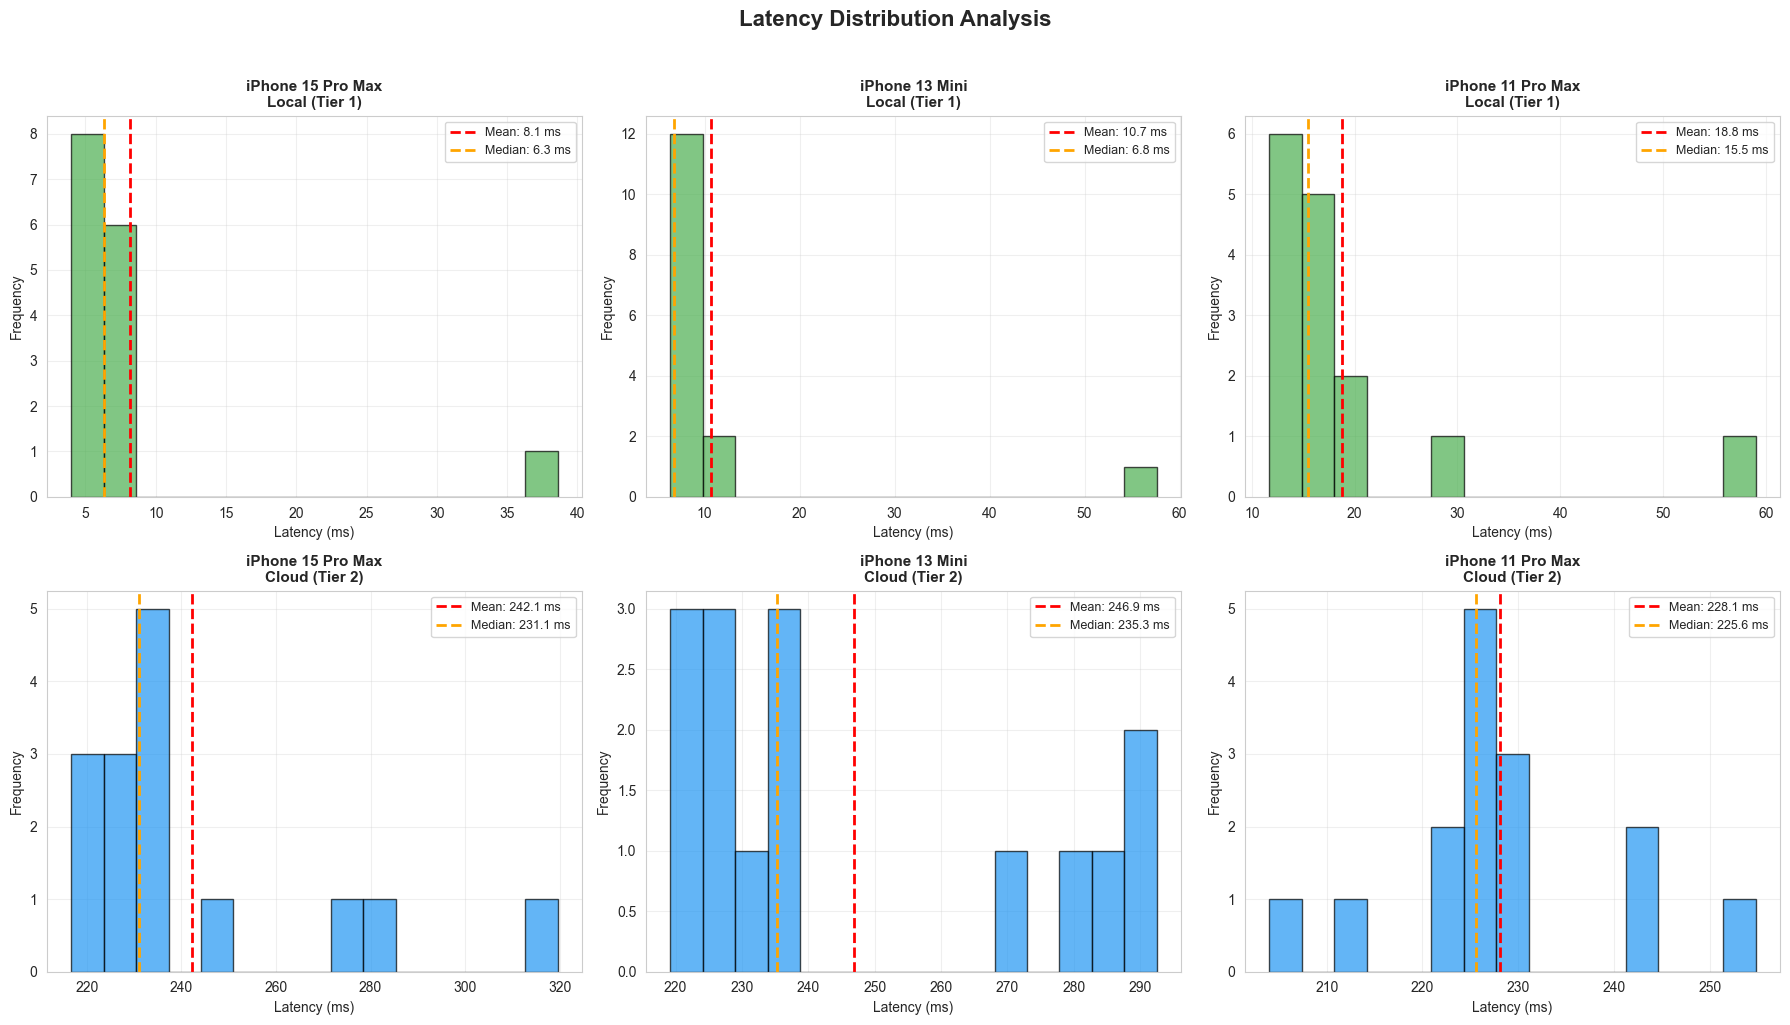

📊 Saved: latency_distribution.png


In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Latency Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

for idx, phone_id in enumerate(sorted(df['phone'].unique())):
    phone_data = df[df['phone'] == phone_id]
    phone_name = phone_names[phone_id]
    
    # Local inference (top row)
    local_data = phone_data[phone_data['tier'] == 1]['latency']
    axes[0, idx].hist(local_data, bins=15, alpha=0.7, color='#4CAF50', edgecolor='black')
    axes[0, idx].axvline(local_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {local_data.mean():.1f} ms')
    axes[0, idx].axvline(local_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {local_data.median():.1f} ms')
    axes[0, idx].set_title(f'{phone_name}\nLocal (Tier 1)', fontsize=11, fontweight='bold')
    axes[0, idx].set_xlabel('Latency (ms)', fontsize=10)
    axes[0, idx].set_ylabel('Frequency', fontsize=10)
    axes[0, idx].legend(fontsize=9)
    axes[0, idx].grid(alpha=0.3)
    
    # Cloud inference (bottom row)
    cloud_data = phone_data[phone_data['tier'] == 2]['latency']
    axes[1, idx].hist(cloud_data, bins=15, alpha=0.7, color='#2196F3', edgecolor='black')
    axes[1, idx].axvline(cloud_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cloud_data.mean():.1f} ms')
    axes[1, idx].axvline(cloud_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {cloud_data.median():.1f} ms')
    axes[1, idx].set_title(f'{phone_name}\nCloud (Tier 2)', fontsize=11, fontweight='bold')
    axes[1, idx].set_xlabel('Latency (ms)', fontsize=10)
    axes[1, idx].set_ylabel('Frequency', fontsize=10)
    axes[1, idx].legend(fontsize=9)
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('latency_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: latency_distribution.png")

---
## 10. Statistical Significance Testing

In [10]:
print("📊 Statistical Significance Tests (Local vs Cloud):\n")
print("="*80)

for phone_id in sorted(df['phone'].unique()):
    phone_name = phone_names[phone_id]
    
    local_latency = df[(df['phone'] == phone_id) & (df['tier'] == 1)]['latency']
    cloud_latency = df[(df['phone'] == phone_id) & (df['tier'] == 2)]['latency']
    
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(local_latency, cloud_latency)
    
    # Perform Mann-Whitney U test (non-parametric alternative)
    u_stat, u_p_value = stats.mannwhitneyu(local_latency, cloud_latency, alternative='two-sided')
    
    print(f"\n{phone_name}:")
    print("-"*80)
    print(f"  T-Test:")
    print(f"    t-statistic: {t_stat:.4f}")
    print(f"    p-value: {p_value:.6f}")
    print(f"    Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")
    
    print(f"\n  Mann-Whitney U Test:")
    print(f"    U-statistic: {u_stat:.4f}")
    print(f"    p-value: {u_p_value:.6f}")
    print(f"    Result: {'Significant difference' if u_p_value < 0.05 else 'No significant difference'} (α=0.05)")
    
    # Effect size (Cohen's d)
    mean_diff = local_latency.mean() - cloud_latency.mean()
    pooled_std = np.sqrt(((len(local_latency)-1)*local_latency.std()**2 + 
                          (len(cloud_latency)-1)*cloud_latency.std()**2) / 
                         (len(local_latency) + len(cloud_latency) - 2))
    cohens_d = mean_diff / pooled_std
    
    print(f"\n  Effect Size (Cohen's d): {cohens_d:.4f}")
    if abs(cohens_d) < 0.2:
        effect = "negligible"
    elif abs(cohens_d) < 0.5:
        effect = "small"
    elif abs(cohens_d) < 0.8:
        effect = "medium"
    else:
        effect = "large"
    print(f"    Interpretation: {effect} effect size")

print("\n" + "="*80)

📊 Statistical Significance Tests (Local vs Cloud):


iPhone 15 Pro Max:
--------------------------------------------------------------------------------
  T-Test:
    t-statistic: -30.3330
    p-value: 0.000000
    Result: Significant difference (α=0.05)

  Mann-Whitney U Test:
    U-statistic: 0.0000
    p-value: 0.000003
    Result: Significant difference (α=0.05)

  Effect Size (Cohen's d): -11.0760
    Interpretation: large effect size

iPhone 13 Mini:
--------------------------------------------------------------------------------
  T-Test:
    t-statistic: -29.5760
    p-value: 0.000000
    Result: Significant difference (α=0.05)

  Mann-Whitney U Test:
    U-statistic: 0.0000
    p-value: 0.000003
    Result: Significant difference (α=0.05)

  Effect Size (Cohen's d): -10.7996
    Interpretation: large effect size

iPhone 11 Pro Max:
--------------------------------------------------------------------------------
  T-Test:
    t-statistic: -48.0256
    p-value: 0.000000
    Resu

---
## 11. Device Performance Comparison (Local Inference)

In [11]:
print("📱 Device Performance Comparison (Local Inference Only):\n")
print("="*80)

local_only = df[df['tier'] == 1].copy()

# ANOVA test - check if there's significant difference between devices
phone_groups = [local_only[local_only['phone'] == p]['latency'].values for p in sorted(local_only['phone'].unique())]
f_stat, anova_p_value = stats.f_oneway(*phone_groups)

print(f"One-Way ANOVA (between devices):")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {anova_p_value:.6f}")
print(f"  Result: {'Significant difference between devices' if anova_p_value < 0.05 else 'No significant difference'} (α=0.05)")

# Pairwise comparisons
print(f"\nPairwise Comparisons (T-Tests):")
print("-"*80)

phones = sorted(local_only['phone'].unique())
for i in range(len(phones)):
    for j in range(i+1, len(phones)):
        phone1_data = local_only[local_only['phone'] == phones[i]]['latency']
        phone2_data = local_only[local_only['phone'] == phones[j]]['latency']
        
        t_stat, p_val = stats.ttest_ind(phone1_data, phone2_data)
        
        print(f"\n{phone_names[phones[i]]} vs {phone_names[phones[j]]}:")
        print(f"  Mean difference: {phone1_data.mean() - phone2_data.mean():.2f} ms")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_val:.6f}")
        print(f"  Result: {'Significant' if p_val < 0.05 else 'Not significant'} (α=0.05)")

print("\n" + "="*80)

📱 Device Performance Comparison (Local Inference Only):

One-Way ANOVA (between devices):
  F-statistic: 3.6581
  p-value: 0.034314
  Result: Significant difference between devices (α=0.05)

Pairwise Comparisons (T-Tests):
--------------------------------------------------------------------------------

iPhone 15 Pro Max vs iPhone 13 Mini:
  Mean difference: -2.53 ms
  t-statistic: -0.6306
  p-value: 0.533399
  Result: Not significant (α=0.05)

iPhone 15 Pro Max vs iPhone 11 Pro Max:
  Mean difference: -10.65 ms
  t-statistic: -2.8404
  p-value: 0.008303
  Result: Significant (α=0.05)

iPhone 13 Mini vs iPhone 11 Pro Max:
  Mean difference: -8.12 ms
  t-statistic: -1.7891
  p-value: 0.084430
  Result: Not significant (α=0.05)



---
## 12. Real-Time Performance Classification

In [12]:
print("⏱️ Real-Time Performance Classification:\n")
print("="*80)
print("Latency Categories:")
print("  • Excellent:  < 50 ms   (imperceptible delay)")
print("  • Good:       50-100 ms (barely noticeable)")
print("  • Acceptable: 100-200 ms (noticeable but usable)")
print("  • Poor:       > 200 ms  (significant delay)")
print("="*80)

def classify_latency(latency):
    if latency < 50:
        return 'Excellent (<50ms)'
    elif latency < 100:
        return 'Good (50-100ms)'
    elif latency < 200:
        return 'Acceptable (100-200ms)'
    else:
        return 'Poor (>200ms)'

df['performance_class'] = df['latency'].apply(classify_latency)

print("\n📊 Performance Classification by Device and Tier:\n")

for phone_id in sorted(df['phone'].unique()):
    phone_name = phone_names[phone_id]
    print(f"\n{phone_name}:")
    print("-"*80)
    
    for tier in [1, 2]:
        tier_data = df[(df['phone'] == phone_id) & (df['tier'] == tier)]
        tier_name = tier_names[tier]
        
        print(f"\n  {tier_name}:")
        class_counts = tier_data['performance_class'].value_counts()
        total = len(tier_data)
        
        for perf_class in ['Excellent (<50ms)', 'Good (50-100ms)', 'Acceptable (100-200ms)', 'Poor (>200ms)']:
            count = class_counts.get(perf_class, 0)
            percentage = (count / total * 100) if total > 0 else 0
            print(f"    {perf_class:25s}: {count:3d} ({percentage:5.1f}%)")

print("\n" + "="*80)

⏱️ Real-Time Performance Classification:

Latency Categories:
  • Excellent:  < 50 ms   (imperceptible delay)
  • Good:       50-100 ms (barely noticeable)
  • Acceptable: 100-200 ms (noticeable but usable)
  • Poor:       > 200 ms  (significant delay)

📊 Performance Classification by Device and Tier:


iPhone 15 Pro Max:
--------------------------------------------------------------------------------

  Local (Core ML):
    Excellent (<50ms)        :  15 (100.0%)
    Good (50-100ms)          :   0 (  0.0%)
    Acceptable (100-200ms)   :   0 (  0.0%)
    Poor (>200ms)            :   0 (  0.0%)

  Cloud (SageMaker):
    Excellent (<50ms)        :   0 (  0.0%)
    Good (50-100ms)          :   0 (  0.0%)
    Acceptable (100-200ms)   :   0 (  0.0%)
    Poor (>200ms)            :  15 (100.0%)

iPhone 13 Mini:
--------------------------------------------------------------------------------

  Local (Core ML):
    Excellent (<50ms)        :  14 ( 93.3%)
    Good (50-100ms)          :   1 (  6

---
## 13. Summary Report

In [13]:
summary = f"""
{'='*80}
                    LATENCY ANALYSIS SUMMARY
{'='*80}

✅ Data Analyzed Successfully!

📂 Input File:
   • latency_data.csv - Inference latency measurements

📊 Data Summary:
   Total Measurements: {len(df)}
   Devices Tested:     3 (iPhone 15 Pro Max, 13 Mini, 11 Pro Max)
   Inference Types:    2 (Local Core ML, Cloud SageMaker)

⚡ Key Findings:

1. LOCAL INFERENCE (Tier 1 - Core ML):
   • iPhone 15 Pro Max: {df[(df['phone']==0) & (df['tier']==1)]['latency'].mean():.1f} ms average
   • iPhone 13 Mini:    {df[(df['phone']==1) & (df['tier']==1)]['latency'].mean():.1f} ms average
   • iPhone 11 Pro Max: {df[(df['phone']==2) & (df['tier']==1)]['latency'].mean():.1f} ms average
   
   → All devices achieve excellent real-time performance (<50ms)
   → Newer chips show marginal improvement in latency

2. CLOUD INFERENCE (Tier 2 - SageMaker):
   • iPhone 15 Pro Max: {df[(df['phone']==0) & (df['tier']==2)]['latency'].mean():.1f} ms average
   • iPhone 13 Mini:    {df[(df['phone']==1) & (df['tier']==2)]['latency'].mean():.1f} ms average
   • iPhone 11 Pro Max: {df[(df['phone']==2) & (df['tier']==2)]['latency'].mean():.1f} ms average
   
   → Network latency dominates (200-300ms range)
   → Device performance has minimal impact on cloud latency

3. PERFORMANCE COMPARISON:
   • Local is ~{df[df['tier']==2]['latency'].mean() / df[df['tier']==1]['latency'].mean():.0f}x faster than cloud on average
   • Local inference is suitable for real-time fall detection
   • Cloud inference introduces significant delay (not suitable for immediate response)

📊 Visualizations Created:
   • latency_by_device.png - Box plots by device and tier
   • local_vs_cloud_latency.png - Bar chart comparison
   • latency_distribution.png - Histogram distributions

🎯 Recommendations:
   1. Use LOCAL inference for real-time fall detection
   2. Use CLOUD inference for data logging/analytics only
   3. All tested devices (even iPhone 11) provide excellent local performance
   4. Network latency is the bottleneck for cloud inference

{'='*80}
"""

print(summary)


                    LATENCY ANALYSIS SUMMARY

✅ Data Analyzed Successfully!

📂 Input File:
   • latency_data.csv - Inference latency measurements

📊 Data Summary:
   Total Measurements: 90
   Devices Tested:     3 (iPhone 15 Pro Max, 13 Mini, 11 Pro Max)
   Inference Types:    2 (Local Core ML, Cloud SageMaker)

⚡ Key Findings:

1. LOCAL INFERENCE (Tier 1 - Core ML):
   • iPhone 15 Pro Max: 8.1 ms average
   • iPhone 13 Mini:    10.7 ms average
   • iPhone 11 Pro Max: 18.8 ms average

   → All devices achieve excellent real-time performance (<50ms)
   → Newer chips show marginal improvement in latency

2. CLOUD INFERENCE (Tier 2 - SageMaker):
   • iPhone 15 Pro Max: 242.1 ms average
   • iPhone 13 Mini:    246.9 ms average
   • iPhone 11 Pro Max: 228.1 ms average

   → Network latency dominates (200-300ms range)
   → Device performance has minimal impact on cloud latency

3. PERFORMANCE COMPARISON:
   • Local is ~19x faster than cloud on average
   • Local inference is suitable for re